# Sea Level
Notebook for analysing high and low tide measurement data for several locations wordwide.
Data source is University of Hawaii Sea Level Center (uhslc).

In [1]:
%matplotlib inline

from datetime import datetime
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['svg.fonttype'] = 'none'

Read data for all stations

In [3]:
stations = pd.read_csv('data/stations.csv')

stations['UH#'] = stations['UH#'].apply(lambda x: '{0:0>4}'.format(x))

stations['UH#']

0      0001
1      0002
2      0003
3      0004
4      0005
5      0007
6      0008
7      0009
8      0011
9      0013
10     0014
11     0015
12     0016
13     0017
14     0018
15     0019
16     0021
17     0022
18     0023
19     0024
20     0025
21     0028
22     0029
23     0030
24     0031
25     0033
26     0034
27     0035
28     0038
29     0039
       ... 
260    0804
261    0805
262    0806
263    0807
264    0808
265    0809
266    0816
267    0818
268    0819
269    0820
270    0822
271    0824
272    0825
273    0826
274    0829
275    0830
276    0833
277    0834
278    0835
279    0836
280    0878
281    0900
282    0906
283    0907
284    0908
285    0913
286    0914
287    0915
288    0920
289    0922
Name: UH#, dtype: object

Read all the tide data from uhslc website

In [51]:
def getData(number):
    filename = 'fdd' + str(number) + '.csv'
    url = 'http://uhslc.soest.hawaii.edu/data/csv3/fdd/' + filename
    filepath = 'data/' + filename
    if os.path.exists(filepath):
        df = pd.read_csv(filepath)
    else:
        try:
            df = pd.read_csv(url, header=None, names=['year', 'month', 'day', 'tide'],
                     usecols=['year', 'month', 'day', 'tide'])
            df.to_csv(filepath, index=False)
        except Exception:
            return pd.DataFrame()
    
    df['key'] = number
    print(filename)
    return df
   
df = pd.concat([getData(f) for f in stations['UH#']])

df['timestamp'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')

df.to_csv('data/uhslcData.csv')

df.head()

df.dtypes


fdd0001.csv
fdd0002.csv
fdd0003.csv
fdd0004.csv
fdd0005.csv
fdd0007.csv
fdd0008.csv
fdd0009.csv
fdd0011.csv
fdd0013.csv
fdd0014.csv
fdd0015.csv
fdd0016.csv
fdd0017.csv
fdd0018.csv
fdd0019.csv
fdd0021.csv
fdd0022.csv
fdd0023.csv
fdd0024.csv
fdd0025.csv
fdd0028.csv
fdd0029.csv
fdd0030.csv
fdd0031.csv
fdd0033.csv
fdd0034.csv
fdd0035.csv
fdd0038.csv
fdd0039.csv
fdd0040.csv
fdd0041.csv
fdd0043.csv
fdd0046.csv
fdd0047.csv
fdd0049.csv
fdd0050.csv
fdd0051.csv
fdd0052.csv
fdd0053.csv
fdd0055.csv
fdd0056.csv
fdd0057.csv
fdd0058.csv
fdd0059.csv
fdd0060.csv
fdd0061.csv
fdd0071.csv
fdd0072.csv
fdd0079.csv
fdd0080.csv
fdd0081.csv
fdd0082.csv
fdd0083.csv
fdd0084.csv
fdd0087.csv
fdd0088.csv
fdd0090.csv
fdd0091.csv
fdd0092.csv
fdd0093.csv
fdd0094.csv
fdd0101.csv
fdd0103.csv
fdd0104.csv
fdd0105.csv
fdd0107.csv
fdd0108.csv
fdd0109.csv
fdd0110.csv
fdd0113.csv
fdd0114.csv
fdd0115.csv
fdd0117.csv
fdd0118.csv
fdd0119.csv
fdd0121.csv
fdd0122.csv
fdd0123.csv
fdd0124.csv
fdd0125.csv
fdd0126.csv
fdd0127.csv
fdd0

year                  int64
month                 int64
day                   int64
tide                  int64
key                  object
timestamp    datetime64[ns]
dtype: object

Merge stations and uhslc tide data

In [52]:
df = df.merge(stations, left_on='key', right_on='UH#')

df.tail(10)

,year,month,day,tide,key,timestamp,UH#,GLOSS#,Location,Country,Latitude,Longitude,Start,End
3242722,2014,10,22,1818,0922,2014-10-22,0922,9.0,Mtwara,"Tanzania, United Republic of",-10.28,40.18,2009-10-28,2014-10-31
3242723,2014,10,23,1851,0922,2014-10-23,0922,9.0,Mtwara,"Tanzania, United Republic of",-10.28,40.18,2009-10-28,2014-10-31
3242724,2014,10,24,1856,0922,2014-10-24,0922,9.0,Mtwara,"Tanzania, United Republic of",-10.28,40.18,2009-10-28,2014-10-31
3242725,2014,10,25,1836,0922,2014-10-25,0922,9.0,Mtwara,"Tanzania, United Republic of",-10.28,40.18,2009-10-28,2014-10-31
3242726,2014,10,26,1798,0922,2014-10-26,0922,9.0,Mtwara,"Tanzania, United Republic of",-10.28,40.18,2009-10-28,2014-10-31
3242727,2014,10,27,1802,0922,2014-10-27,0922,9.0,Mtwara,"Tanzania, United Republic of",-10.28,40.18,2009-10-28,2014-10-31
3242728,2014,10,28,1822,0922,2014-10-28,0922,9.0,Mtwara,"Tanzania, United Republic of",-10.28,40.18,2009-10-28,2014-10-31
3242729,2014,10,29,1811,0922,2014-10-29,0922,9.0,Mtwara,"Tanzania, United Republic of",-10.28,40.18,2009-10-28,2014-10-31
3242730,2014,10,30,1814,0922,2014-10-30,0922,9.0,Mtwara,"Tanzania, United Republic of",-10.28,40.18,2009-10-28,2014-10-31
3242731,2014,10,31,1826,0922,2014-10-31,0922,9.0,Mtwara,"Tanzania, United Republic of",-10.28,40.18,2009-10-28,2014-10-31


In [56]:
df.Location.value_counts()

#Grouped by stations

stations_grouped = df.groupby(['Location'])

stations_grouped.head()

,year,month,day,tide,key,timestamp,UH#,GLOSS#,Location,Country,Latitude,Longitude,Start,End
0,2001,12,17,652,0001,2001-12-17,0001,115.0,Pohnpei,"Micronesia, Federated States of",6.96000,158.21000,2001-12-16,2016-07-31
1,2001,12,18,650,0001,2001-12-18,0001,115.0,Pohnpei,"Micronesia, Federated States of",6.96000,158.21000,2001-12-16,2016-07-31
2,2001,12,19,654,0001,2001-12-19,0001,115.0,Pohnpei,"Micronesia, Federated States of",6.96000,158.21000,2001-12-16,2016-07-31
3,2001,12,20,662,0001,2001-12-20,0001,115.0,Pohnpei,"Micronesia, Federated States of",6.96000,158.21000,2001-12-16,2016-07-31
4,2001,12,21,644,0001,2001-12-21,0001,115.0,Pohnpei,"Micronesia, Federated States of",6.96000,158.21000,2001-12-16,2016-07-31
4999,1992,12,4,1711,0002,1992-12-04,0002,113.0,Betio (Tarawa),Kiribati,1.35000,172.91700,1992-12-04,2016-07-31
5000,1992,12,5,1693,0002,1992-12-05,0002,113.0,Betio (Tarawa),Kiribati,1.35000,172.91700,1992-12-04,2016-07-31
5001,1992,12,6,1671,0002,1992-12-06,0002,113.0,Betio (Tarawa),Kiribati,1.35000,172.91700,1992-12-04,2016-07-31
5002,1992,12,7,1680,0002,1992-12-07,0002,113.0,Betio (Tarawa),Kiribati,1.35000,172.91700,1992-12-04,2016-07-31
5003,1992,12,8,1700,0002,1992-12-08,0002,113.0,Betio (Tarawa),Kiribati,1.35000,172.91700,1992-12-04,2016-07-31


In [7]:
#plot_data = df[(df.year >= 2006)].groupby(['Location', 'timestamp']).tide.mean().unstack().T.resample('A').mean()


plot_data = df[(df.timestamp.dt.year >= 1970)
              ].groupby(['Location', 'timestamp']).tide.mean().unstack().T.resample('1A').mean()

plot_data

Location,Abashiri,Aburatsu,Acajutla (Acajutia),Acapulco,Adak,Aden,Alert,Alexandria,Ambon,Andenes,...,Vungtau (Vung Tau),Waikelo,Waitangi Chatham Is.,Wake Is.,Wakkanai,Walvis Bay,Wellington Harbour,Yakutat,Yap,Zanzibar
timestamp,,,,,,,,,,,,,,,,,,,,,
1970-12-31,1439.782123,1493.752809,NaN,NaN,1603.490251,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1600.909589,1693.905556,NaN,1024.071023,2470.200000,1419.419162,NaN
1971-12-31,1438.613707,1506.490411,NaN,NaN,1568.232877,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1539.450276,1690.541667,NaN,1086.930939,2410.453333,NaN,NaN
1972-12-31,1458.062500,1551.871585,NaN,NaN,1550.526316,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1543.450820,1712.670360,NaN,1055.859890,2378.072464,NaN,NaN
1973-12-31,1457.232493,1522.041096,NaN,NaN,1557.438356,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1556.732143,1734.304469,NaN,1035.803987,2495.508065,1493.370909,NaN
1974-12-31,1472.083056,1544.747945,NaN,NaN,1603.560907,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1569.054608,1721.232295,NaN,1053.537190,2449.805634,1397.093151,NaN
1975-12-31,1422.985795,1559.673973,NaN,NaN,1548.682192,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1655.480363,1684.182336,NaN,1059.316667,2417.035616,1454.296089,NaN
1976-12-31,1459.070822,1490.759563,NaN,NaN,1552.718750,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1552.887978,1707.000000,973.750000,1035.539726,2479.449438,1303.505464,NaN
1977-12-31,1419.989041,1509.947945,NaN,NaN,1611.878788,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1520.471591,1689.052055,896.758621,980.372603,2431.320158,1376.369863,NaN
1978-12-31,1439.816438,1499.328767,NaN,NaN,1580.566667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1621.961783,1701.379310,937.327511,979.120548,2407.712934,1383.235616,NaN


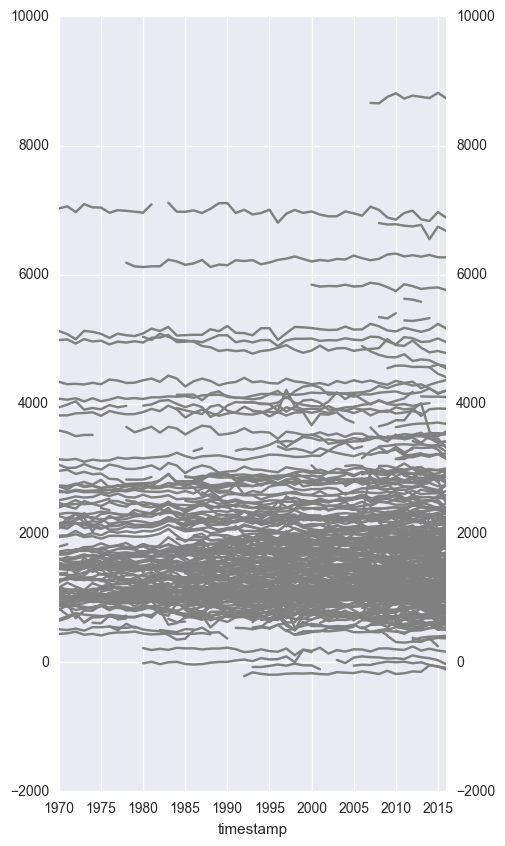

In [8]:
fig  = plt.figure(figsize=(5, 10))
ax = plt.subplot(111)

plot_data.plot(ax=ax, color='gray', legend=False)
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')

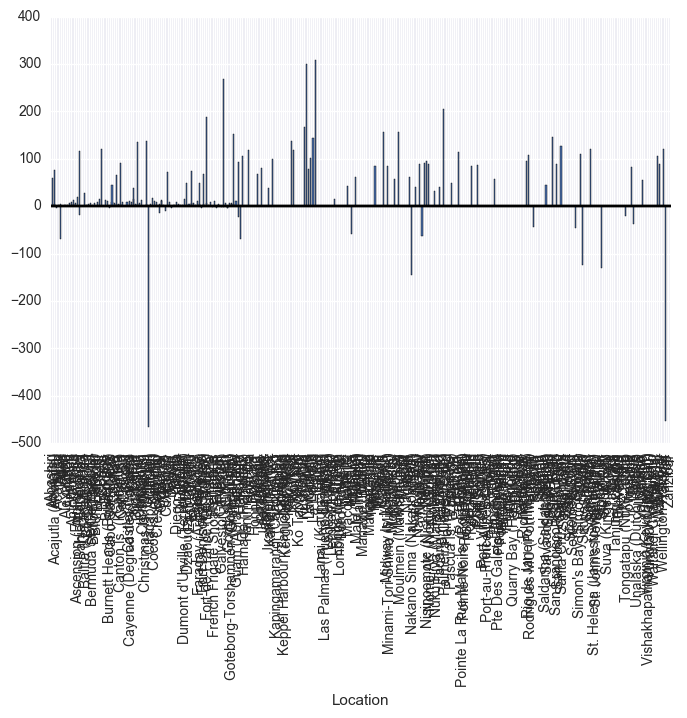

In [11]:
# Check the mean of first 5 values and last 5 values
start_end = pd.DataFrame([plot_data[:5].mean(), plot_data[-5:].mean()]).T

start_end['new_row'] = (1 - start_end[0]/start_end[1])*100

start_end.columns = ['Start', 'End', 'Percent Change']


#stations which have 5 data sets in the 70s and 5 data sets in the present, Out of 89, 15 have negative values

start_end_pct = start_end['Percent Change'].dropna()

start_end_pct.plot(kind='bar'); plt.axhline(0, color='k')


#sea level change

start_end['sea level change'] = start_end['End'] - start_end['Start']

start_end['sea level change'].plot(kind='bar'); plt.axhline(0, color='k')


In [58]:
plot_data

Location,Abashiri,Aburatsu,Acajutla (Acajutia),Acapulco,Adak,Aden,Alert,Alexandria,Ambon,Andenes,...,Vungtau (Vung Tau),Waikelo,Waitangi Chatham Is.,Wake Is.,Wakkanai,Walvis Bay,Wellington Harbour,Yakutat,Yap,Zanzibar
timestamp,,,,,,,,,,,,,,,,,,,,,
1970-12-31,1439.782123,1493.752809,NaN,NaN,1603.490251,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1600.909589,1693.905556,NaN,1024.071023,2470.200000,1419.419162,NaN
1971-12-31,1438.613707,1506.490411,NaN,NaN,1568.232877,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1539.450276,1690.541667,NaN,1086.930939,2410.453333,NaN,NaN
1972-12-31,1458.062500,1551.871585,NaN,NaN,1550.526316,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1543.450820,1712.670360,NaN,1055.859890,2378.072464,NaN,NaN
1973-12-31,1457.232493,1522.041096,NaN,NaN,1557.438356,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1556.732143,1734.304469,NaN,1035.803987,2495.508065,1493.370909,NaN
1974-12-31,1472.083056,1544.747945,NaN,NaN,1603.560907,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1569.054608,1721.232295,NaN,1053.537190,2449.805634,1397.093151,NaN
1975-12-31,1422.985795,1559.673973,NaN,NaN,1548.682192,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1655.480363,1684.182336,NaN,1059.316667,2417.035616,1454.296089,NaN
1976-12-31,1459.070822,1490.759563,NaN,NaN,1552.718750,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1552.887978,1707.000000,973.750000,1035.539726,2479.449438,1303.505464,NaN
1977-12-31,1419.989041,1509.947945,NaN,NaN,1611.878788,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1520.471591,1689.052055,896.758621,980.372603,2431.320158,1376.369863,NaN
1978-12-31,1439.816438,1499.328767,NaN,NaN,1580.566667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1621.961783,1701.379310,937.327511,979.120548,2407.712934,1383.235616,NaN


In [61]:
first_measurement = df.groupby(['Location']).timestamp.first()
stations_1900 = first_measurement[first_measurement.dt.year <= 1900]
stations_1925 = first_measurement[first_measurement.dt.year <= 1925]
stations_1950 = first_measurement[first_measurement.dt.year <= 1950]
stations_1975 = first_measurement[first_measurement.dt.year <= 1975]
stations_1990 = first_measurement[first_measurement.dt.year <= 1990]
stations_2000 = first_measurement[first_measurement.dt.year >= 2000]
stations_2010 = first_measurement[first_measurement.dt.year >= 2010]
stations_2016 = first_measurement[first_measurement.dt.year >= 2016]
# stations_1970
#first_measurement.sort_values()
stations_1900.sort_values()

Location
Galveston (Pier 21)              1904-01-02
Honolulu                         1905-01-02
San Diego                        1906-01-22
Cristobal                        1907-04-04
Balboa                           1907-06-20
Prince Rupert                    1909-01-02
Tofino                           1909-10-02
Atlantic City                    1911-08-20
Key West                         1913-01-20
Newlyn                           1915-04-23
Marseille                        1917-12-01
Cuxhaven                         1917-12-30
Ketchikan                        1918-10-12
Charleston                       1921-10-02
Pensacola                        1923-05-02
La Jolla                         1925-01-01
Hilo                             1927-01-23
Tregde                           1927-10-05
Newport                          1930-09-11
Crescent City                    1933-04-12
Neah Bay                         1934-08-02
Fort Pulaski                     1935-07-02
Sitka                  

In [ ]:
last_measurement = df.groupby(['Location']).timestamp.last()

stations_2016_last = last_measurement[last_measurement.dt.year >= 2016]

#last_measurement.sort_values()
stations_2016_last.sort_values()
len(stations_2016_last)


data = df[(df.timestamp.dt.year >= 2016) &
          (df.Location.isin(stations_2000.index)) &
          (df.Country == 'Philippines')].groupby(['Location', 'timestamp']).tide.mean().unstack().T

# data = data.resample('1A').mean().apply(np.round)
# data = pd.rolling_mean(data.resample("1M", how='mean'), window=12, min_period=1)
data.head()
data.tail(50)

The number of stations that measure tides until 2016 is: 237

## Stations in Detail
I will examine several stations in detail and also read some articles about the stations, I start with Hawaii and the stations Honolulu and Hilo

### Pacific: Hawaii

timestamp
1905-12-31    1260.642857
1906-12-31    1300.920548
1907-12-31    1309.761644
1908-12-31    1290.224044
1909-12-31    1202.747945
1910-12-31    1251.071233
1911-12-31    1230.180822
1912-12-31    1260.647541
1913-12-31    1290.632877
1914-12-31    1343.876712
1915-12-31    1373.810959
1916-12-31    1326.647541
1917-12-31    1307.200549
1918-12-31    1262.826923
1919-12-31    1341.347945
1920-12-31    1414.754098
1921-12-31    1368.604396
1922-12-31    1329.024658
1923-12-31    1319.339726
1924-12-31    1295.234973
1925-12-31    1343.652055
1926-12-31    1329.712329
1927-12-31    1300.161644
1928-12-31    1280.046448
1929-12-31    1295.676712
1930-12-31    1329.512329
1931-12-31    1341.950685
1932-12-31    1337.357923
1933-12-31    1324.268493
1934-12-31    1289.167123
                 ...     
1987-12-31    1378.786301
1988-12-31    1464.355191
1989-12-31    1401.180822
1990-12-31    1352.016438
1991-12-31    1396.038356
1992-12-31    1434.584459
1993-12-31    1419.123288
19

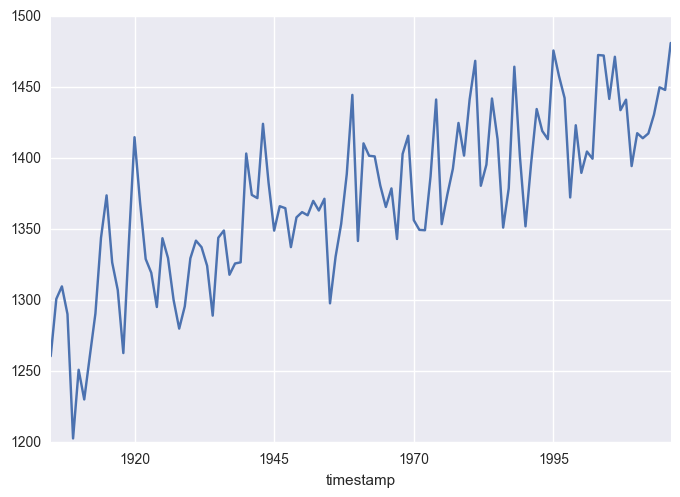

In [22]:
#The longest Pacific island tide gauge: Honolulu, Oahu Island (where Honolulu is on) is said to stay stable vertically (no subsidence)

#df[df.Location == 'Honolulu'].set_index('timestamp').tide.resample('1A').mean().plot()

honolulu = df[df.Location == 'Honolulu'].set_index('timestamp').tide.resample('1A').mean()

hono_pct = honolulu.pct_change()

hono_diff = honolulu.diff(1)

honolulu.plot()

honolulu


In [ ]:
#Hilo, the rise is exceptional. Big Island (where Hilo is on) is said to sink (subsidence)

df[df.Location == 'Hilo'].set_index('timestamp').tide.resample('5A').mean().plot()

hilo = df[df.Location == 'Hilo'].set_index('timestamp').tide.resample('1A').mean()

### Pacific: Philippines
5 stations in the philippines

In [ ]:
data_philippines = df[(df.Country == 'Philippines')]

first_measurement_phil = data_philippines.groupby(['Location']).timestamp.first()

first_measurement_phil.head()

In [ ]:
last_measurement_phil = data_philippines.groupby(['Location']).timestamp.last()

last_measurement_phil.head()

In [ ]:
data_phil_plot = data_philippines[(df.timestamp.dt.year >= 2000)].groupby(['Location', 'timestamp']).tide.mean().unstack().T

data_phil_plot.tail(10)

fig  = plt.figure(figsize=(5, 10))
ax = plt.subplot(111)

data_phil_plot.plot(ax=ax, legend=True)
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')

In [ ]:
df[df.Location == 'Davao'].set_index('timestamp').tide.resample('1A').mean().plot()

In [ ]:
df[df.Location == 'Virginia Key (Bear Cut)'].set_index('timestamp').tide.resample('1A').mean().plot()

In [ ]:
df[df.Location == 'Currmao'].set_index('timestamp').tide.resample('1A').mean().plot()

In [ ]:
#data = df[(df.timestamp.dt.year >= 1990)].groupby(['Location', 'timestamp']).tide.mean().unstack().T
#data = data.resample('1A').mean().apply(np.round)

data = df[(df.timestamp.dt.year >= 1970)
          & (df.timestamp.dt.year <= 2016)].groupby(['Location', 'timestamp']).tide.mean().unstack().T

data = data.resample("1A").rolling(window=10, min_periods=1).mean().apply(np.round)

data.head()

In [ ]:
def plot_grid(df, cols=4, **kwargs):
    fig, axes = plt.subplots(nrows=int(np.ceil(len(df.columns) / cols)), ncols=cols)
    fig.set_figheight(6)
    fig.set_figwidth(8)

    for i, x in enumerate(df.columns):
        ax = axes[i // cols, i % cols]
        df[x].plot(ax=ax, color='blue', legend=False, label=False,
                   kind='line', stacked=False, sharex=False,
                   figsize=(25, 50))
        ax.set_title(x)
        ax.xaxis.set_visible(False)
    return fig

fig = plot_grid(data)
fig.show()

In [ ]:
data = df[(df.timestamp.dt.year >= 1970)
          & (df.timestamp.dt.year <= 2016)].groupby(['Location', 'timestamp']).tide.mean().unstack().T
data = pd.rolling_mean(data.resample("1A").mean(), window=10, min_periods=1).apply(np.round)